Class 1 Data:
           0          1   2
0  328.12500  734.37500 NaN
1  261.71875  730.46875 NaN
2  300.78125  667.96875 NaN
3  324.21875  691.40625 NaN
4  320.31250  625.00000 NaN

Class 2 Data:
           0           1   2
0  785.15625  1152.34375 NaN
1  757.81250  1136.71875 NaN
2  789.06250  1085.93750 NaN
3  781.25000  1101.56250 NaN
4  789.06250  1105.46875 NaN

Class 3 Data:
           0           1   2
0  320.31250  1492.18750 NaN
1  265.62500  2335.93750 NaN
2  285.15625  2281.25000 NaN
3  238.28125  2402.34375 NaN
4  261.71875  2343.75000 NaN


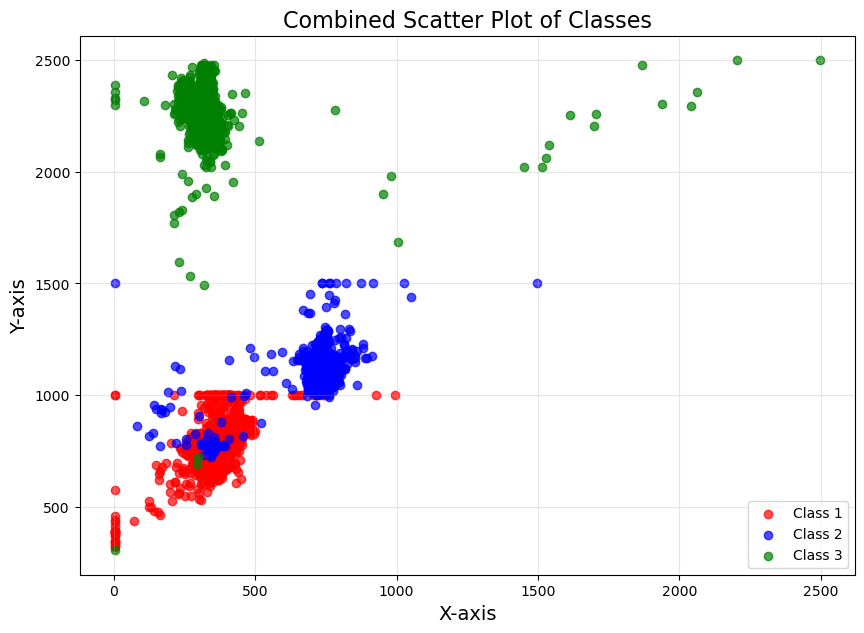


Distances between the random point and each class mean:
Class 1: 1723.34
Class 2: 1420.04
Class 3: 199.25

The closest class mean to the random point is: Class 3


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

# Load datasets with space delimiter from specified paths
class1 = pd.read_csv(r'C:\Users\nitip\OneDrive\Desktop\dec2024\Group04[1]\Group04\rd_group4\class1.txt', delimiter=' ', header=None)
class2 = pd.read_csv(r'C:\Users\nitip\OneDrive\Desktop\dec2024\Group04[1]\Group04\rd_group4\class2.txt', delimiter=' ', header=None)
class3 = pd.read_csv(r'C:\Users\nitip\OneDrive\Desktop\dec2024\Group04[1]\Group04\rd_group4\class3.txt', delimiter=' ', header=None)

# Print the first few rows and number of columns to inspect the datasets
print("Class 1 Data:")
print(class1.head())  # Check the structure of class1

print("\nClass 2 Data:")
print(class2.head())  # Check the structure of class2

print("\nClass 3 Data:")
print(class3.head())  # Check the structure of class3

# Assign column names based on the actual structure of the data
# Example: If there are three columns, assign the names ['X', 'Y', 'Z']
if class1.shape[1] == 3:
    class1.columns = ['X', 'Y', 'Z']
if class2.shape[1] == 3:
    class2.columns = ['X', 'Y', 'Z']
if class3.shape[1] == 3:
    class3.columns = ['X', 'Y', 'Z']

# Combine the datasets
combined_dataset = pd.concat([class1, class2, class3], ignore_index=True)

# Scatter plot for classes (using only 'X' and 'Y' if available)
plt.figure(figsize=(10, 7))
plt.scatter(class1['X'], class1['Y'], color='red', label='Class 1', alpha=0.7)
plt.scatter(class2['X'], class2['Y'], color='blue', label='Class 2', alpha=0.7)
plt.scatter(class3['X'], class3['Y'], color='green', label='Class 3', alpha=0.7)

plt.title("Combined Scatter Plot of Classes", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Features and labels (considering only 'X' and 'Y' columns for the features)
X = combined_dataset[['X', 'Y']]  # Features (X and Y)
y = np.concatenate([np.zeros(len(class1)), np.ones(len(class2)), np.full(len(class3), 2)])  # Labels: Class 1, 2, 3

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to calculate Euclidean distances between a random point and dataset
def euclidean_distances(X_train, random_point):
    distances = []  # To store calculated distances
    for _, row in X_train.iterrows():
        row_point = row.values  # Convert row to NumPy array
        distance = np.sqrt(np.sum((row_point - random_point) ** 2))  # Euclidean formula
        distances.append(distance)  # Append result to distances
    return np.array(distances)

# Calculate distances array
random_point = X.sample(n=1).values.flatten()  # Select a random point from X
# Calculate the mean of each class manually
mean_class1 = [sum(class1['X']) / len(class1), sum(class1['Y']) / len(class1)]
mean_class2 = [sum(class2['X']) / len(class2), sum(class2['Y']) / len(class2)]
mean_class3 = [sum(class3['X']) / len(class3), sum(class3['Y']) / len(class3)]

# Store the class means
class_means = {
    'Class 1': mean_class1,
    'Class 2': mean_class2,
    'Class 3': mean_class3
}

# Function to calculate Euclidean distance manually
def calculate_distance(point1, point2):
    distance = 0  # Initialize distance
    for i in range(len(point1)):
        difference = point1[i] - point2[i]
        distance += difference * difference  # Square the difference
    return distance ** 0.5  # Take the square root of the sum

# Calculate the distances between the random point and each class mean
distances = {}
for class_name, mean in class_means.items():
    distance = calculate_distance(random_point, mean)
    distances[class_name] = distance

# Print the distances
print("\nDistances between the random point and each class mean:")
for class_name, distance in distances.items():
    print(f"{class_name}: {distance:.2f}")

# Determine the closest class mean
closest_class = None
min_distance = float('inf')
for class_name, distance in distances.items():
    if distance < min_distance:
        min_distance = distance
        closest_class = class_name

print(f"\nThe closest class mean to the random point is: {closest_class}")


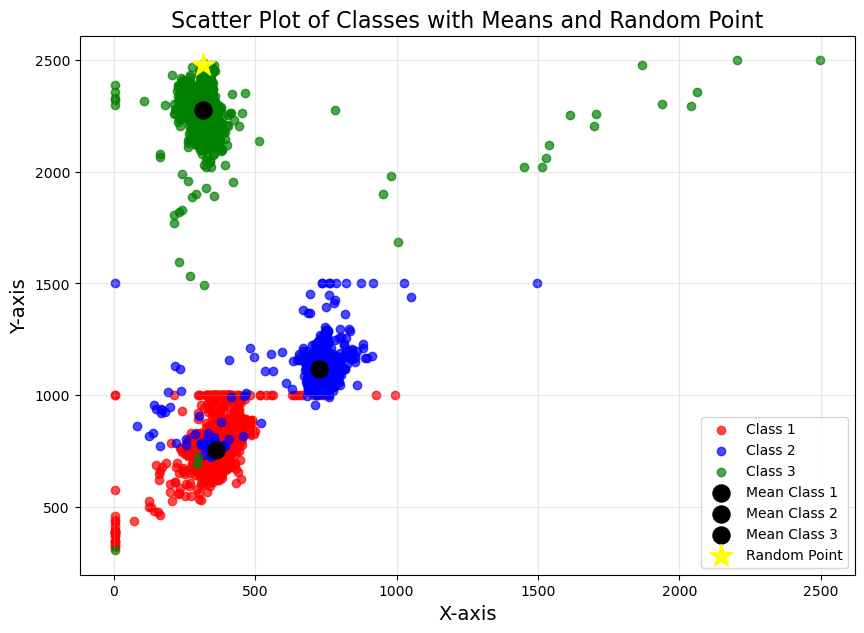

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming the datasets are already loaded and the means are already calculated

# Scatter plot of the classes
plt.figure(figsize=(10, 7))

# Scatter for class1
plt.scatter(class1['X'], class1['Y'], color='red', label='Class 1', alpha=0.7)

# Scatter for class2
plt.scatter(class2['X'], class2['Y'], color='blue', label='Class 2', alpha=0.7)

# Scatter for class3
plt.scatter(class3['X'], class3['Y'], color='green', label='Class 3', alpha=0.7)

# Plot the means of each class
plt.scatter(mean_class1[0], mean_class1[1], color='black', marker='o', s=150, label='Mean Class 1')
plt.scatter(mean_class2[0], mean_class2[1], color='black', marker='o', s=150, label='Mean Class 2')
plt.scatter(mean_class3[0], mean_class3[1], color='black', marker='o', s=150, label='Mean Class 3')

# Plot the random point
plt.scatter(random_point[0], random_point[1], color='yellow', marker='*', s=300, label='Random Point')

# Add labels, title, legend, and grid
plt.title("Scatter Plot of Classes with Means and Random Point", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate and plot Confusion Matrix
def evaluate_metrics(y_test, y_pred):
    # Calculate Confusion Matrix manually
    conf_matrix = np.zeros((3, 3), dtype=int)  # 3 classes (Class 1, Class 2, Class 3)
    for true, pred in zip(y_test, y_pred):
        conf_matrix[int(true), int(pred)] += 1
    
    # Function to calculate precision, recall, and F1 score manually
    def precision(conf_matrix, class_idx):
        tp = conf_matrix[class_idx, class_idx]
        fp = np.sum(conf_matrix[:, class_idx]) - tp
        return tp / (tp + fp) if tp + fp != 0 else 0

    def recall(conf_matrix, class_idx):
        tp = conf_matrix[class_idx, class_idx]
        fn = np.sum(conf_matrix[class_idx, :]) - tp
        return tp / (tp + fn) if tp + fn != 0 else 0

    def f1_score(precision, recall):
        return 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0

    # Calculate precision, recall, and F1 score for each class
    precision_scores = [precision(conf_matrix, i) for i in range(3)]
    recall_scores = [recall(conf_matrix, i) for i in range(3)]
    f1_scores = [f1_score(precision_scores[i], recall_scores[i]) for i in range(3)]

    # Plot the Confusion Matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'])
    plt.title("Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.show()

    # Print the metrics
    print(f"Precision for each class: {precision_scores}")
    print(f"Recall for each class: {recall_scores}")
    print(f"F1 Score for each class: {f1_scores}")

    # Overall metrics
    weighted_precision = np.sum([precision_scores[i] * np.sum(conf_matrix[i, :]) for i in range(3)]) / np.sum(conf_matrix)
    weighted_recall = np.sum([recall_scores[i] * np.sum(conf_matrix[:, i]) for i in range(3)]) / np.sum(conf_matrix)
    weighted_f1 = 2 * (weighted_precision * weighted_recall) / (weighted_precision + weighted_recall) if weighted_precision + weighted_recall != 0 else 0

    print(f"\nOverall Weighted Precision: {weighted_precision:.2f}")
    print(f"Overall Weighted Recall: {weighted_recall:.2f}")
    print(f"Overall Weighted F1 Score: {weighted_f1:.2f}")
    
    return conf_matrix, precision_scores, recall_scores, f1_scores


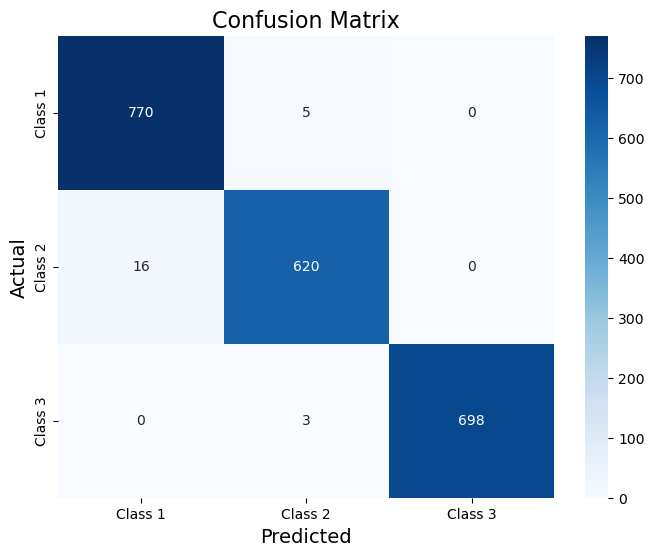

Precision for each class: [0.9796437659033079, 0.9872611464968153, 1.0]
Recall for each class: [0.9935483870967742, 0.9748427672955975, 0.9957203994293866]
F1 Score for each class: [0.9865470852017938, 0.9810126582278481, 0.997855611150822]

Overall Weighted Precision: 0.99
Overall Weighted Recall: 0.99
Overall Weighted F1 Score: 0.99


In [8]:
conf_matrix, precision_scores, recall_scores, f1_scores = evaluate_metrics(y_test, y_pred)
